# diagnosing model overfitting

Your model is "overfitting" your training data when it starts to 'fit' the 'error' in the data, rather than fitting the general 'pattern'. When this happens, the model becomes 'specific' to the *particular* data set you used to train it, and it won't "generalize" well to *new* data.

We can 'exploit' what overfitting 'looks like' to develop a 'diagnostic' for determining if a model is 'overfit' or not.

We just need *two* data sets:

* __training data__ to fit the parameters of the model
* __validation data__ to 'check' if the fit model 'generalizes' to new data

If the model performs roughly *the same* on the training and validation data, then the model is probably *not* overfitting the training data. However, if the model performs *much better* on the *training* data, it is probably overfitting.

How do we measure the model's 'performance'?

Well, we *already* have the "loss function", which tells us how well the model's predictions 'fit' the 'real' response values. We can use the *same* loss function that we use to fit the model to the training data to evaluate the model's performance on the validation data.

So, our "overfitting diagnostic" procedure will go something like this:

1. Partition the data into 2 sub-sets: training and validation
2. Fit the model to the training data and evaluate the "training loss"
3. Evaluate the model's "validation loss" using the validation data
4. If the validation loss is *much higher* than the training loss, the model is "overfit" to the training data (here we assume that *lower* loss is *better*, which it usually is). Otherwise, if the validation loss and the training loss are *about the same*, we can conclude that the model is probably not overfitting the training data.

This diagnostic procedure is *widely used* in AI and machine learning, so tensorflow and other libraries have *built in procedures* to help facilitate its use.

First, we need to partition our data into training and validation sub-sets. We'll start by simulating some data.

In [7]:
import sklearn.datasets

x,y = sklearn.datasets.make_regression(n_samples=100,
                                       n_features=1,
                                       bias=100.0,
                                       noise=10.0,
                                       random_state=201188)

y /= 100.0

And we can plot our data, as before.

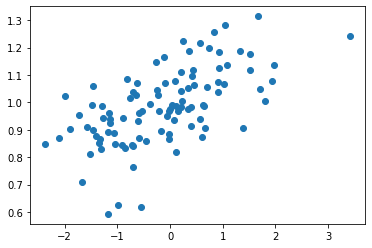

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x,y, marker='o')

These are pretty 'noisy' data, but it is what it is. We can't 'decide' what data we'll get, only how we'll analyze it.

## splitting data into training and validation sub-sets

Now let's 'split' or "partition" our existing data into training and validation sub-sets. This 'mimics' the procedure of going out and collecting an entirely *new* data set for validation.

If this were a *real* data analysis, we would want to be *extremely careful* about how we partition our data into training and validation sub-sets, so we don't 'fool' ourselves into thinking our model is doing well, when in fact it isn't. We want our validation to be a fair and realistic assessment of our model's expected performance on new data.

In general, we want our validation data set to have a couple important properties:

* We want the validation data to be "representative" of the "entire" data set. We *don't* want the validation data to *only* represent a narrow range of x- or y-values; we want it to span the *entire range* of both x- and y-values.
* We want the validation data to be "independent" of the training data. Ideally, the validation data should represent an entirely *new* and independent data sample from the same underlying distribution as the training data. If the validation data samples are *too similar* to the training samples, the validation data and the training data are 'essentially the same', and the validation data no longer represents a good way to test how the model will perform on 'new' data.



## a note on 3-way train-validate-test splits

In our data analyses so far, we have been using a *single, pre-determined* neural network to analyze our data. This approach assumes that we already know which specific model we want to use, before collecting *any* data.

In many cases, we might want to *try out* a bunch of *different* models, and then pick the *best one* to actually do the data analysis. This procedure is called "model selection".

The way "model selection" typically works in neural network modeling is as follows.

* First, you build *many different* neural networks. 
* Then, each network is fit to the same training data and evaluated for overfitting using the same validation data.
* Finally, you use the performance of the models on the validation data to *select* the *best* model. Typically, you just choose the model with the *lowest loss* on the *validation* data as your 'best' model.

But then, how do we evaluate the 'best' model's expected performance on *new* data?

We *already* used the validation data to select the best model, so we can't *also* use the validation data to evaluate the best model's expected performance on *new* data - the model has *already seen* the validation data!

In this case, we need *another* new data sub-set, typically called the "test data", in order to evaluate the best model's expected performance.

This can be accomplished (and typically is), by partitioning the initial data into *3* sub-sets:

* __training data__ - for fitting model parameters
* __validation data__ - for evaluating overfitting and choosing the best model
* __test data__ - for evaluating the best model's performance on *new* data.

The important thing to remember is that, for this procedure to be reliable, you can *only* analyze the test data *__once__* at the very end, using the single model that you have chosen as the 'best' model. After you have calculated your model's loss on the test data, your analysis is *over* and you *can't change anything*. Otherwise, you might be inadvertently using the test data to help build your model, which invalidates the test!